In [3]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({
    'ML_lab_hrs':[12,13,5,6,8,7,6,3,4,10],
    'score':[9,10,5,6,7,8,5,2,3,9]
})
df.to_csv('my_data.csv')

In [5]:
#Pedhazur formula
x_mean=df['ML_lab_hrs'].mean()
y_mean=df['score'].mean()
print(x_mean)
print(y_mean)

7.4
6.4


In [8]:
numerator_b1=np.sum((df['ML_lab_hrs']-x_mean)*(df['score']-y_mean))
denominator_b1=np.sum((df['ML_lab_hrs']-x_mean)**2)
b1=numerator_b1/denominator_b1
b1

0.750996015936255

In [9]:
b0=y_mean-(b1*x_mean)
b0

0.8426294820717128

In [10]:
df['predicted']=b0 + (df['ML_lab_hrs']*b1)

0     9.854582
1    10.605578
2     4.597610
3     5.348606
4     6.850598
5     6.099602
6     5.348606
7     3.095618
8     3.846614
9     8.352590
Name: predicted, dtype: float64

In [12]:
df[['predicted','score']]

,predicted,score
0,9.854582,9
1,10.605578,10
2,4.597610,5
3,5.348606,6
4,6.850598,7
5,6.099602,8
6,5.348606,5
7,3.095618,2
8,3.846614,3
9,8.352590,9


In [13]:
import math
rmse=math.sqrt(np.sum((df['predicted']-df['score'])**2)/10)
rmse

0.8817539565211134

In [16]:
# Calculus method
n=10
xi_sum=np.sum(df['ML_lab_hrs'])
xi_sq_sum=np.sum(df['ML_lab_hrs']**2)
mat1=np.array([[n,xi_sum],
              [xi_sum,xi_sq_sum]])
print(mat1)

[[ 10  74]
 [ 74 648]]


In [18]:
mat1_inv=np.linalg.inv(mat1)
mat1_inv

array([[ 0.64541833, -0.07370518],
       [-0.07370518,  0.00996016]])

In [23]:
yi_sum=np.sum(df['score'])
xy_sum=np.sum(df['ML_lab_hrs']*df['score'])
mat2=np.array([yi_sum,xy_sum])
print(mat2)

[ 64 549]


In [24]:
print(mat1_inv.shape)
print(mat2.shape)

(2, 2)
(2,)


In [25]:
coeff=np.dot(mat1_inv,mat2)
coeff

array([0.84262948, 0.75099602])

In [26]:
b0_calc=coeff[0]
b1_calc=coeff[1]
df['calculus_predicted']=b0_calc + (b1_calc*df['ML_lab_hrs'])
df[['score','predicted','calculus_predicted']]

,score,predicted,calculus_predicted
0,9,9.854582,9.854582
1,10,10.605578,10.605578
2,5,4.597610,4.597610
3,6,5.348606,5.348606
4,7,6.850598,6.850598
5,8,6.099602,6.099602
6,5,5.348606,5.348606
7,2,3.095618,3.095618
8,3,3.846614,3.846614
9,9,8.352590,8.352590


In [27]:
#scatter plot
import matplotlib.pyplot as plt

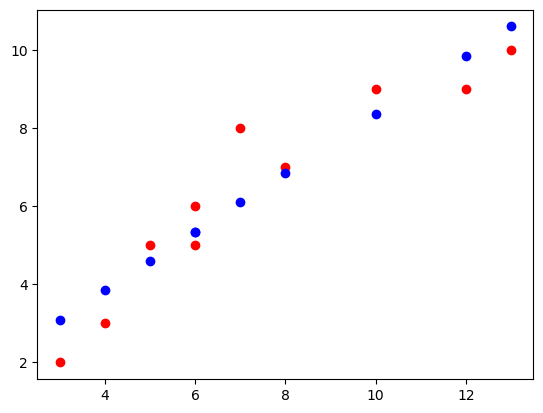

In [30]:
plt.scatter(df['ML_lab_hrs'],df['score'],color='red',marker='o')
plt.scatter(df['ML_lab_hrs'],df['predicted'],color='blue',marker='o')

In [31]:
#Test with lab hrs=10

y=b0 + (b1*10)
y

8.352589641434262